In [86]:
import panel as pn
pn.extension()

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import holoviews as hv

In [2]:
import os

In [3]:
path = r'C:\Users\sarad\Github\pathology\data'
files = [f for f in os.listdir(path) if f.endswith('.png')]

In [4]:
files

['10a.png',
 '11a.png',
 '12z01a.png',
 '13a.png',
 '1a.png',
 '2.png',
 '3.png',
 '3_b.png',
 '4.png',
 '5.png',
 '6a.png',
 '7a.png',
 '8a.png',
 '9a.png']

In [50]:
filename = files[6]

PNG(str)
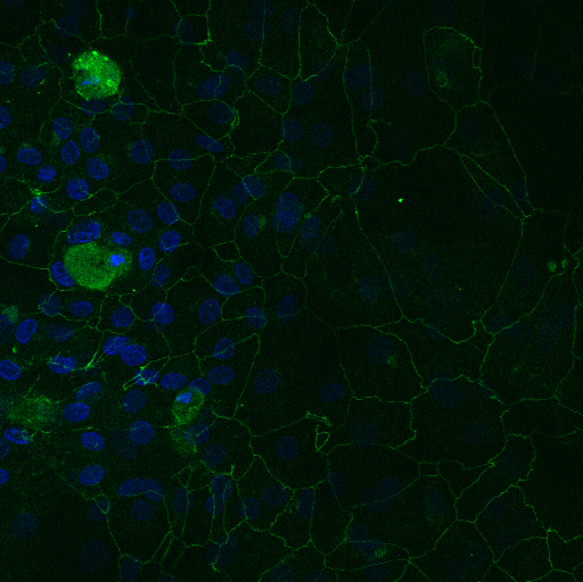

In [51]:
pn.panel(filename)

PNG(str, width=128)
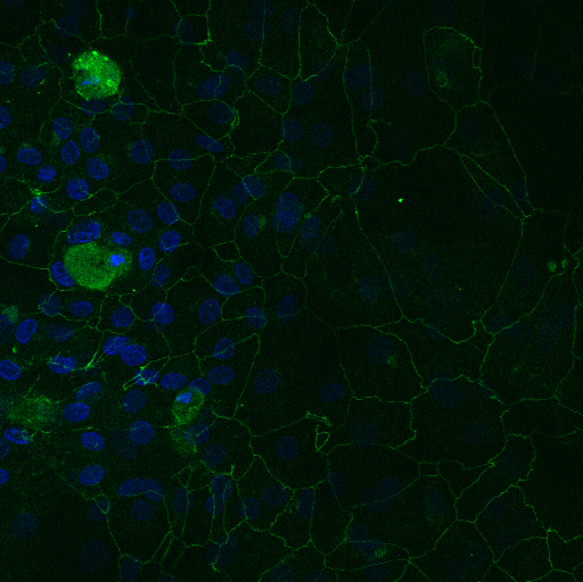

In [52]:
ori_img = pn.panel(filename, width=128)  # Panel can't display .tif (use .png instead).
ori_img

In [95]:
files_dropdown = pn.widgets.Select(options=files)

In [342]:
b_thr = pn.widgets.IntSlider(end = 50, start = 5, value = 5)
g_thr = pn.widgets.IntSlider(end = 50, start = 15, value = 15)
b_int = pn.widgets.IntSlider(end = 200, start = 100, value = 150)
g_int = pn.widgets.IntSlider(end = 200, start = 100, value = 150)

In [343]:
@pn.depends(filename=files_dropdown, 
            b_threshold=b_thr.param.value, 
            g_threshold=g_thr.param.value, 
            b_intensity=b_int.param.value, 
            g_intensity=g_int.param.value)
def intensifier(filename=filename, b_threshold=5, g_threshold=25, b_intensity=200, g_intensity=200):
    path = r'C:\Users\sarad\Github\pathology\data'
    file = os.path.join(path,filename)
    imageObject = Image.open(file)
    multiBands  = imageObject.split()
    im_r2arr = np.array(multiBands[0])
    im_g2arr = np.array(multiBands[1])
    im_b2arr = np.array(multiBands[2])

    b = im_b2arr >= b_threshold
    im_b2arr[b] = b_intensity

    g = im_g2arr >= g_threshold
    im_g2arr[g] = g_intensity

    R = Image.fromarray(im_r2arr)
    G = Image.fromarray(im_g2arr)
    B = Image.fromarray(im_b2arr)
    
#     newImage = Image.merge("RGB", (R, G, B))
#     print(np.max(newImage))
#     print(np.array(newImage)[:,:,2].max())
#     return hv.RGB(np.stack([im_r2arr,im_g2arr,im_b2arr]),axis=2)
    output = np.zeros((im_b2arr.shape[0],im_b2arr.shape[1],3))
    output[:,:,0] = im_r2arr
    output[:,:,1] = im_g2arr
    output[:,:,2] = im_b2arr
    return hv.RGB(output.astype(int))
#     return hv.Image(im_r2arr,label='R') * hv.Image(im_g2arr,label='G') *hv.Image(im_b2arr,label='B')
#     return hv.Overlay([hv.Image(im_r2arr,label='R'), hv.Image(im_g2arr,label='G'), hv.Image(im_b2arr,label='B')])
#     return 

In [344]:
intensifier(filename=files[6], b_threshold=5, g_threshold=25, b_intensity=200, g_intensity=200)

:RGB   [x,y]   (R,G,B)

In [345]:
print(app)

Column
    [0] Column
        [0] Select(name='filename', options=['10a.png', '11a.png', ...], value='3.png')
        [1] IntSlider(end=50, name='b_threshold', start=5, value=5)
        [2] IntSlider(end=50, name='g_threshold', start=15, value=31, value_throttled=31)
        [3] IntSlider(end=200, name='b_intensity', start=150, value=200)
        [4] IntSlider(end=200, name='g_intensity', start=150, value=200)
    [1] Row
        [0] PNG(Image, name='interactive00246')


### dropdown

In [346]:
@pn.depends(filename=files_dropdown.param.value)
def f(filename):
    path = r'C:\Users\sarad\Github\pathology\data'
    file = os.path.join(path,filename)
    return hv.RGB.load_image(file)

In [347]:
dmap2 = hv.DynamicMap(f)

In [348]:
dmap = hv.DynamicMap(intensifier)

In [349]:
title = pn.Column('# Intensifier')
title

Column
    [0] Markdown(str)

In [350]:
row = pn.Row(
    pn.Column(title,
    "### Original Image", dmap2, files_dropdown,
    "\n"
    "##### Choose the blue channel threshold", b_thr,
    "##### Choose the green channel threshold", g_thr,
    "##### Choose the intensity for blue colour", b_int,
    "##### Choose the intensity for green colour", g_int
             ),
    pn.Column(
    "### Intensified Image", dmap,
            )
    )

In [351]:
row.servable()

Row
    [0] Column
        [0] Column
            [0] Markdown(str)
        [1] Markdown(str)
        [2] HoloViews(DynamicMap)
        [3] Select(options=['10a.png', '11a.png', ...], value='11a.png')
        [4] Markdown(str)
        [5] IntSlider(end=50, start=5, value=5)
        [6] Markdown(str)
        [7] IntSlider(end=50, start=15, value=15)
        [8] Markdown(str)
        [9] IntSlider(end=200, start=100, value=150)
        [10] Markdown(str)
        [11] IntSlider(end=200, start=100, value=150)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(DynamicMap)

In [171]:
row.show()

Launching server at http://localhost:60247


#### Click the link above to access the interactive website page

In [352]:
pwd

'C:\\Users\\sarad\\Github\\Datathon'